# The MNIST Dataset
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

[MNIST Website](http://yann.lecun.com/exdb/mnist/)

[Convolutional Network Demo from 1993](https://youtu.be/FwFduRA_L6Q)

The dataset is included in the keras library. We will import the dataset, and apply different machine learning techniques to it.

# Loading and Preparing the Data

In [3]:
from matplotlib import pyplot as plt
import numpy as np
plt.style.available
plt.style.use('ggplot')

In [4]:
# Loading the MNIST dataset from Keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# printing the shapes of the arrays
def print_shapes(*arrays):
    [print(a.shape) for a in arrays]

print_shapes(train_images, train_labels, test_images, test_labels)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
train_images[0].shape

(28, 28)

In [10]:
train_labels[0]

5

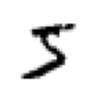

In [11]:
plt.figure(figsize=(1, 1)) and plt.axis('off')
plt.imshow(train_images[0], cmap=plt.cm.binary)

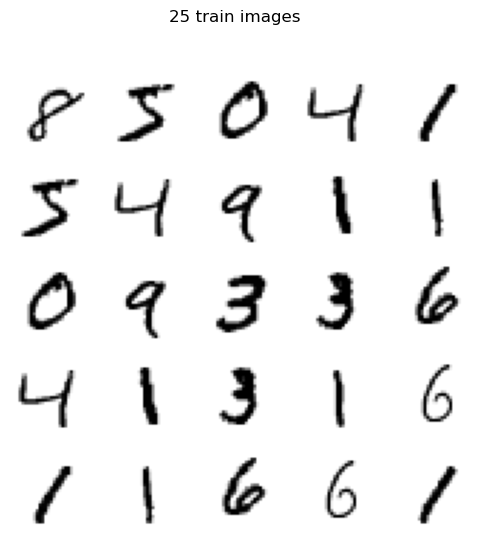

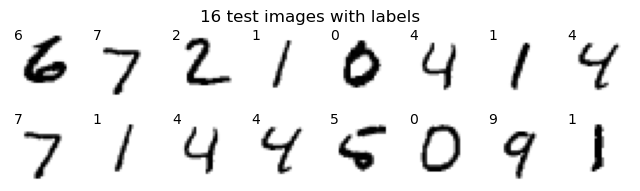

In [12]:
# create a function to plot a subset of the data along with labels, and predicted values (if available)

def plot_images(dataset, row=5, col=5, size=(6, 6), labels=None, predicted=None, title=None):
    fig, axes = plt.subplots(nrows=row, ncols=col, figsize=size)
    if title: fig.suptitle(title)
    for r in range(row):
        for c in range(col):
            index = (r+1)*(c+1)-2
            digit = dataset[index]
            # generate the plot for one image
            axes[r, c].imshow(digit, cmap=plt.cm.binary)
            axes[r, c].axis('off')
            # print the labels
            try: axes[r, c].text(1, 3, str(labels[index]))
            except: pass
            # print the predictions
            try: 
                if predicted[index] == labels[index]:
                    axes[r, c].text(1, 13, str(predicted[index]))
                else:
                    axes[r, c].text(1, 13, str(predicted[index]), color='r')
            except: pass
    return plt.show()

plot_images(train_images, title="25 train images")
plot_images(test_images, 2, 8, size=(8, 2), labels=test_labels, title="16 test images with labels")

In [13]:
# preparing the image data - converting the images to one dimentional arrays
X_train = train_images.reshape((60000, 28*28)).astype('float32') / 255
X_test = test_images.reshape((10000, 28*28)).astype('float32') / 255

# labels as numbers (for sklearn)
y_train = train_labels
y_test  = test_labels

# Fitting a Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X_train, y_train)
linear.intercept_, linear.coef_.shape

(3.0075881, (784,))

In [22]:
print("Linear Model")
print("acc. on training set:", linear.score(X_train, y_train))
print("acc. on testing set:", linear.score(X_test, y_test))

Linear Model
acc. on training set: 0.6160465633194254
acc. on testing set: 0.4737685347819053


In [23]:
predicted_linear = linear.predict(X_test)
print(predicted_linear)
predicted_linear = [int(n) for n in predicted_linear]
print(predicted_linear[0:10])

[6.2952023 2.3475325 1.6208329 ... 7.861167  5.504551  5.738156 ]
[6, 2, 1, 0, 4, 1, 7, 5, 3, 8]


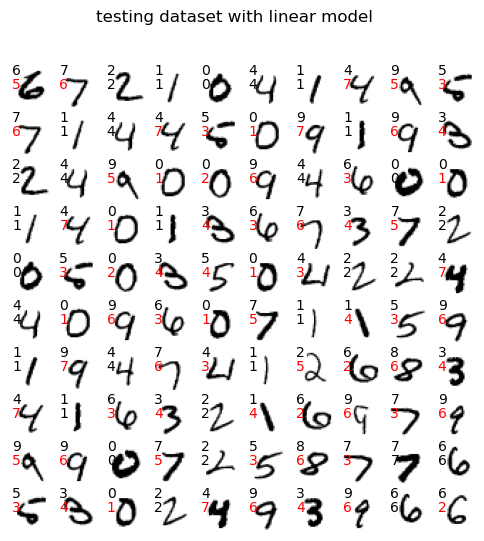

In [24]:
plot_images(test_images, 10, 10, labels=test_labels, predicted=predicted_linear, title="testing dataset with linear model")

# Fitting a Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000).fit(X_train, y_train)
logistic.intercept_.shape, logistic.coef_.shape

((10,), (10, 784))

In [27]:
print("Logistic Model")
print("acc. on training set:", logistic.score(X_train, y_train))
print("acc. on testing set:", logistic.score(X_test, y_test))

Logistic Model
acc. on training set: 0.9387666666666666
acc. on testing set: 0.926


In [28]:
predicted_logistic = logistic.predict(X_test)
print(predicted_logistic)
predicted_logistic = [int(n) for n in predicted_logistic]
print(predicted_logistic[0:10])

[7 2 1 ... 4 5 6]
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]


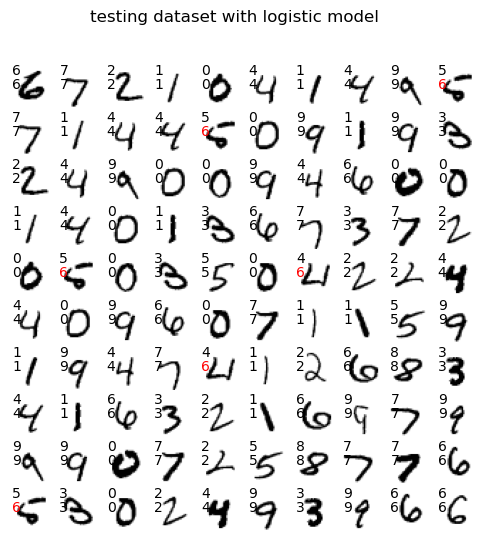

In [29]:
plot_images(test_images, 10, 10, labels=test_labels, predicted=predicted_logistic, title="testing dataset with logistic model")

# Fitting a Neural Network

In [35]:
# preparing the labels as arrays (for keras)
from keras.utils import to_categorical
Y_train = to_categorical(train_labels)
Y_test  = to_categorical(test_labels)

print(y_train[0], Y_train[0]) # number 5
print(y_test[0], Y_test[0]) # number 7
Y_train.shape, Y_test.shape

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


((60000, 10), (10000, 10))

In [75]:
# the network architecture
from keras import models, layers
network = models.Sequential()
network.name = "nn_digit_model"
# Adding the input layers - two possible ways
##  preferred way, note that input layer has no activation
network.add(layers.Input(shape=(28*28, ))) 
network.add(layers.Dense(512, activation='relu'))
## less preferred acts as input and layer                         
# network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "nn_digit_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# compile the network
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
# train the network
network.fit(X_train, Y_train, epochs=5, batch_size=128)
network

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8682 - loss: 0.4278
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9707 - loss: 0.0939
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9815 - loss: 0.0590
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9871 - loss: 0.0398
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9912 - loss: 0.0260


<Sequential name=nn_digit_model, built=True>

In [78]:
train_loss, train_acc = network.evaluate(X_train, Y_train)
test_loss, test_acc = network.evaluate(X_test, Y_test)

print("Neural Network")
print("acc. on training set:", train_acc)
print("acc. on testing set:", test_acc)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.9930 - loss: 0.0205
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.9790 - loss: 0.0799
Neural Network
acc. on training set: 0.9934499859809875
acc. on testing set: 0.980400025844574


In [82]:
predicted_nn_vectors = network.predict(X_test)
print(predicted_nn_vectors[0])
print(np.argmax(predicted_nn_vectors[0]))
predicted_nn_vectors.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
[4.3675400e-11 2.2543856e-09 5.7767632e-08 1.0868497e-05 6.3447229e-13
 4.7900595e-10 5.6770274e-15 9.9998903e-01 2.3348994e-09 1.2320648e-07]
7


(10000, 10)

In [83]:
predicted_nn = [np.argmax(arr) for arr in predicted_nn_vectors]
print(predicted_nn[0:10])

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]


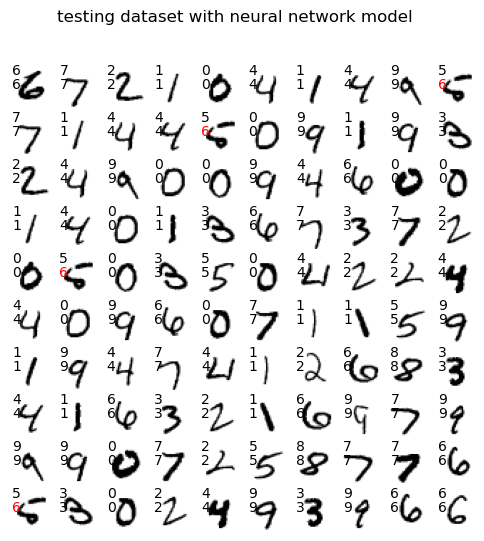

In [85]:
plot_images(test_images, 10, 10, labels=test_labels, predicted=predicted_nn, title="testing dataset with neural network model")